In [5]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_clean = df.drop_duplicates().copy()
df_clean = df_clean.drop_duplicates(subset=['job_title','company_name','job_country'])
df_clean['job_skills'] = df_clean['job_skills'].apply(lambda skills:ast.literal_eval(skills)if pd.notna(skills)else skills)

In [6]:
df_explode = df_clean.explode('job_skills')

In [35]:
skill_stats = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills','size'),
    median_salary = ('salary_year_avg', 'median')
)
skill_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(10)

In [26]:
skill_stats

,skill_count,median_salary
job_skills,,
sql,254552,117500.00000
python,249156,125000.00000
aws,95578,131808.50000
excel,88582,90000.00000
azure,87715,125000.00000
r,83288,119417.50000
tableau,83195,111175.00000
spark,72658,137300.15625
power bi,67076,100000.00000


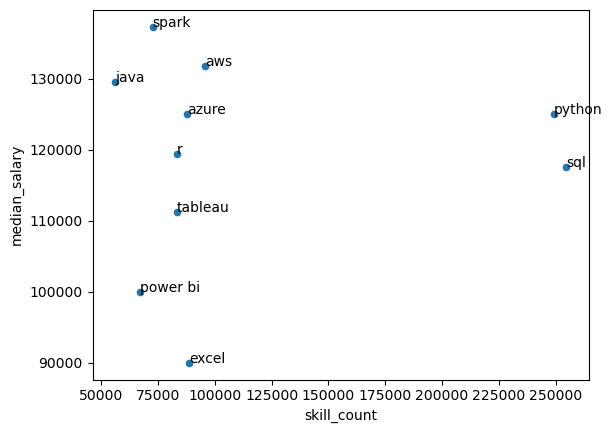

In [34]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)